# Aim- Loan Eligibility prediction ML algorithm by RAJEN CHHETRY.

In [3]:
#loading packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [10]:
#Reading Train data 
train = pd.read_csv('train_ctrUa4K.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
#Reading Test data
test = pd.read_csv('test_lAUu6dG.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [12]:
train_original=train.copy() #copy of train data
test_original=test.copy() #copy of test data

In [13]:
#UNDERSTAND THE DATASET train 
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
#UNDERSTAND THE DATASET test
test.columns 

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have similar features in the test dataset as the train dataset except the Loan_Status. We will predict the Loan_Status using the model built using the train data.


In [15]:
train.dtypes #understand the data types format 

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are three formats of data types.
object: Object format means variables are categorical.
Object= Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status.
int64: It represents the integer variables.
integer= ApplicantIncome
float64: It represents the variable which have some decimal values involved.
Float = CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History 

In [16]:
train.shape

(614, 13)

In [17]:
test.shape

(367, 12)

In [18]:
train['Loan_Status'].value_counts() #counts yes/No values for Loan status

Y    422
N    192
Name: Loan_Status, dtype: int64

In [19]:
train['Loan_Status'].value_counts(normalize=True) #Normalize the counts

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

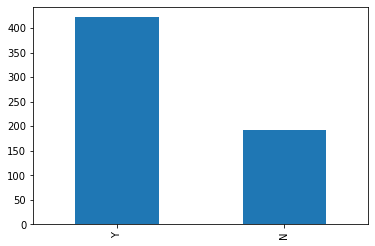

In [20]:
train['Loan_Status'].value_counts().plot.bar() #ploting bar graph for loan status 

<AxesSubplot:ylabel='Loan_Status'>

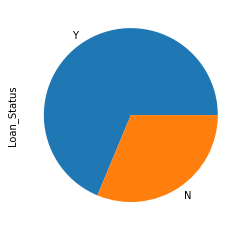

In [21]:
train['Loan_Status'].value_counts().plot.pie() #ploting the graph in pie chart 

# Independent Variable (Categorical)

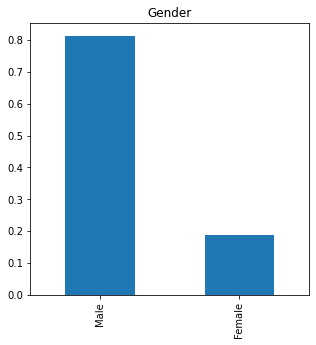

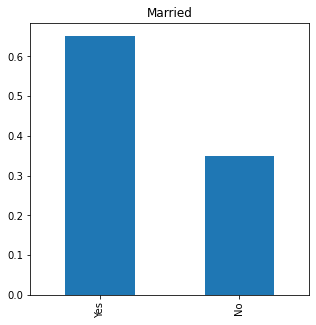

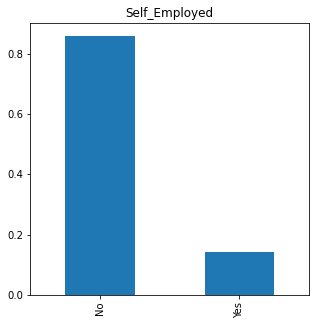

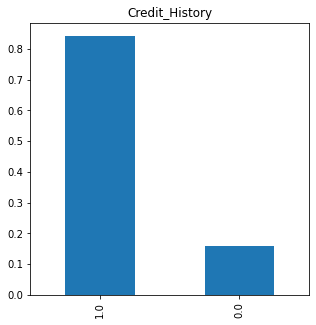

In [22]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Gender')
plt.show()
train['Married'].value_counts(normalize=True).plot.bar(figsize=(5,5),title='Married')
plt.show()
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(5,5),title='Self_Employed')
plt.show()
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(5,5),title='Credit_History')
plt.show()


# Independent Variable (Ordinal)

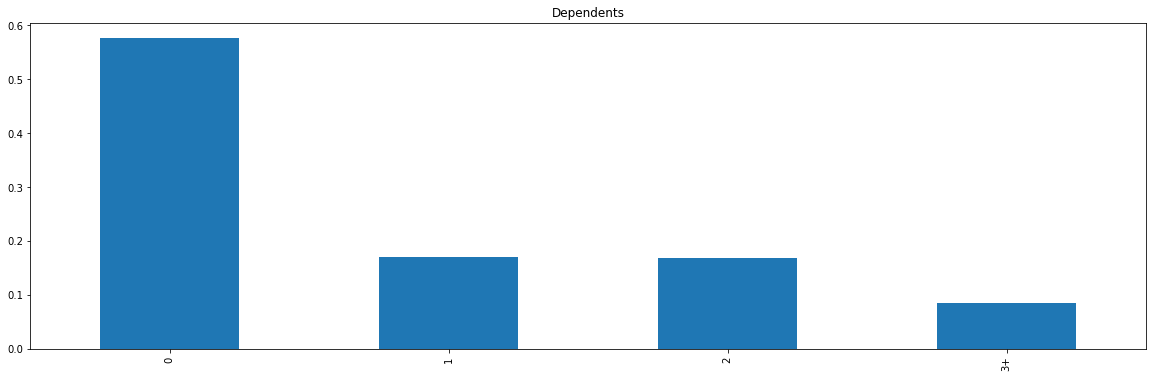

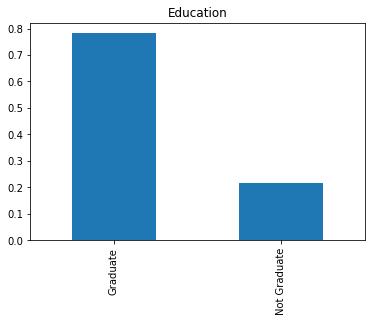

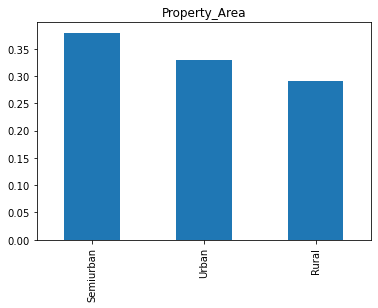

In [23]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,6), title='Dependents')
plt.show()
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

# Independent Variable (Numerical)

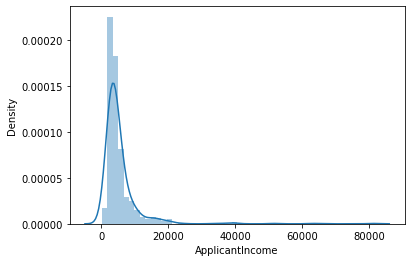

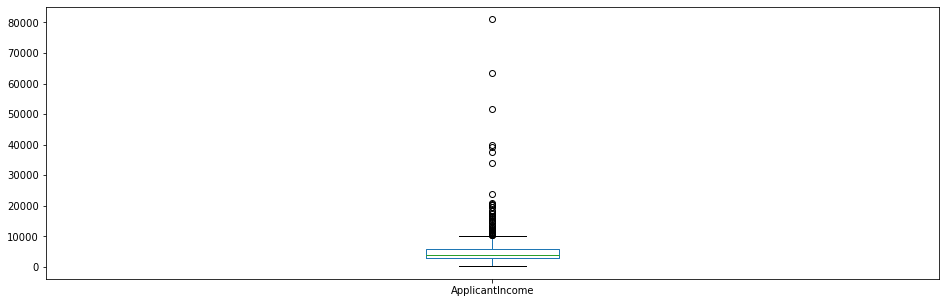

In [24]:
sns.distplot(train['ApplicantIncome']) #DISTRIBUTION PLOT FOR DATA
plt.show()
train['ApplicantIncome'].plot.box(figsize=(16,5)) #BOX PLOT FOR NUMERICAL DATA
plt.show()

 The distribution of applicant income is towards left which means it is not normally distributed.
 
 The boxplot confirms the presence of a lot of outliers/extreme values.

Text(0.5, 0.98, '')

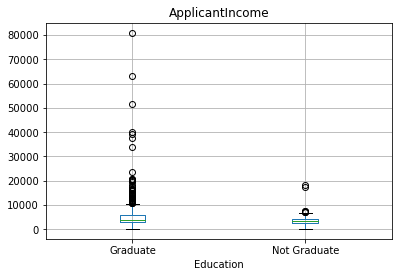

In [25]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("") #box plot for applicant income with respect to education

 There are a higher number of graduates with very high incomes, which are appearing to be outliers.

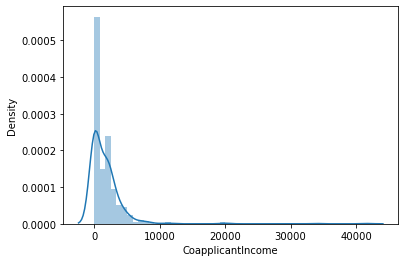

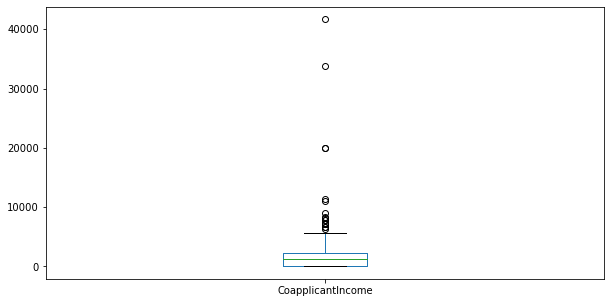

In [26]:
sns.distplot(train['CoapplicantIncome']) #distribution plot for coapplicantIncome
plt.show()
train['CoapplicantIncome'].plot.box(figsize=(10,5)) #box plot
plt.show()

The majority of co-applicants income ranges from 0 to 4000. We also see a lot of outliers in the applicant's income and it is not normally distributed.

In [27]:
train.notna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,True,True,True,True,True,True,True,True,False,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,True,True,True,True,True,True,True,True,True,True,True,True,True
610,True,True,True,True,True,True,True,True,True,True,True,True,True
611,True,True,True,True,True,True,True,True,True,True,True,True,True
612,True,True,True,True,True,True,True,True,True,True,True,True,True


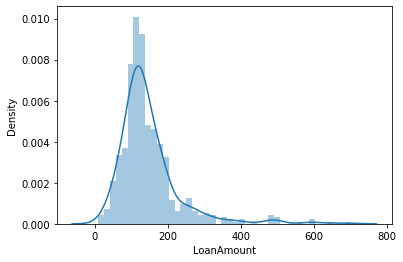

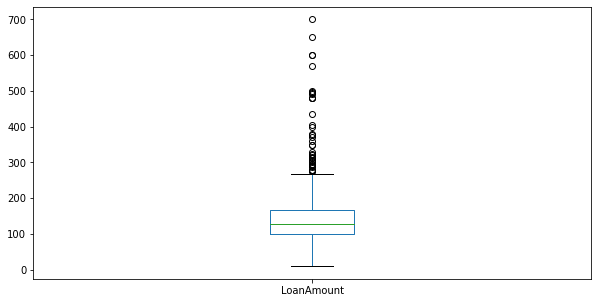

In [28]:
sns.distplot(train['LoanAmount'])
plt.show()
train['LoanAmount'].plot.box(figsize=(10,5))
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

# Bivariate Analysis¶

Let's recall some of the hypotheses that we generated earlier:

Applicants with high incomes should have more chances of loan approval.

Applicants who have repaid their previous debts should have higher chances of loan approval.

Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.
Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.

Let's try to test the above-mentioned hypotheses using bivariate analysis

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

# Categorical Independent Variable vs Target Variable¶

 Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

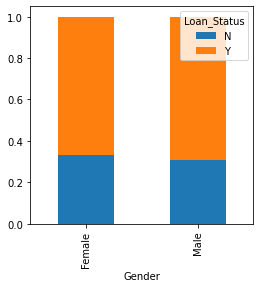

In [29]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4)) #stacked bar plot
plt.show()

It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.

Now let us visualize the remaining categorical variables vs target variable.

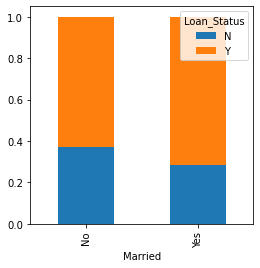

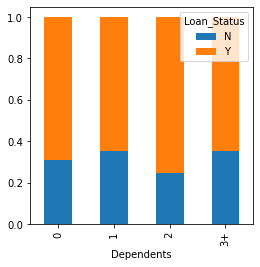

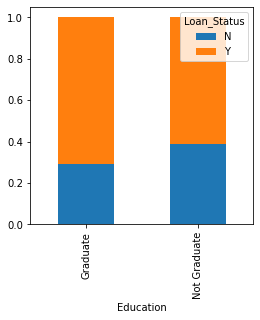

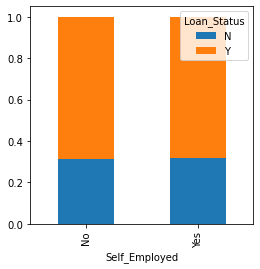

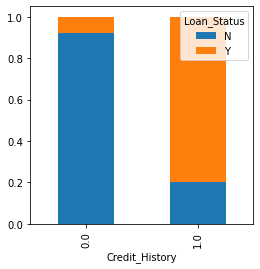

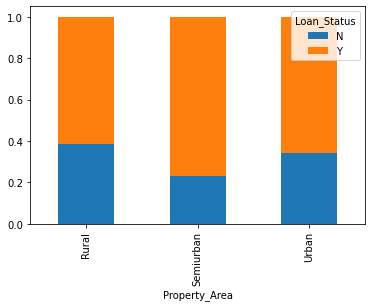

In [30]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

The proportion of married appliants is higher for approved loans.

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

It seems people with a credit history as 1 are more likely to get their loans approved.*

The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.

# Numerical Independent Variable vs Target Variable

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

<AxesSubplot:xlabel='Loan_Status'>

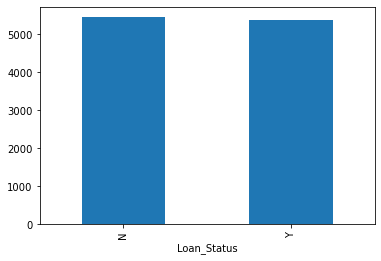

In [31]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don't see any change in the mean income. So, let's make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

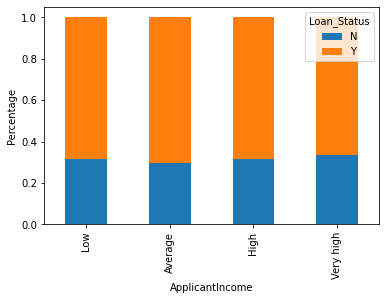

In [32]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar manner.

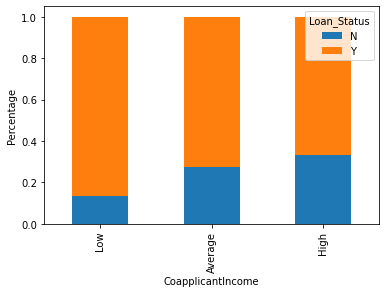

In [33]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

 It shows that if co-applicants income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don't have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it. So, we can make a new variable in which we will combine the applicant's and co-applicants income to visualize the combined effect of income on loan approval.

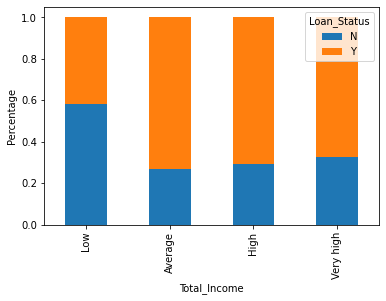

In [34]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less compared to that of applicants with Average, High & Very High Income.

visualize the Loan Amount variable.

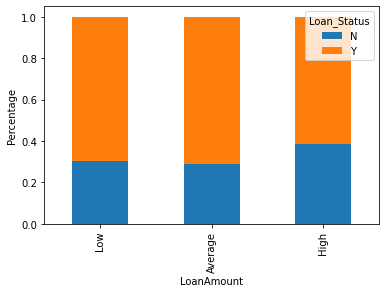

In [35]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [36]:
# print(train.dtypes)
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

Now let's look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. 

<AxesSubplot:>

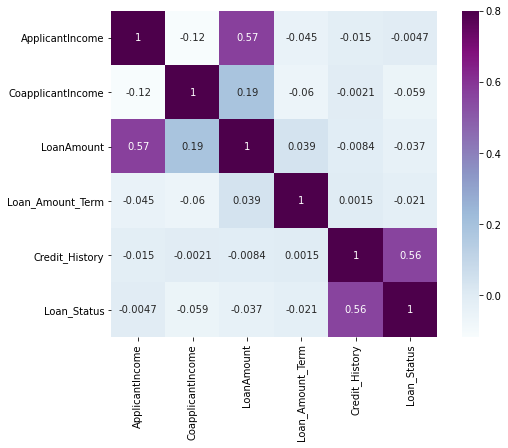

In [37]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

We see that the most correlate variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

# Missing Value 

In [38]:
train.isnull().sum() # list out feature-wise count of missing values.

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median
    
For categorical variables: imputation using mode

In [39]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

Let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable..

In [40]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [41]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

As it is a numerical variable, we can use mean or median to impute the missing values

In [42]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Now lets check whether all the missing values are filled in the dataset.

In [43]:
train.isnull().sum() #Finding the missing values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

 Let’s fill all the missing values in the test dataset too with the same approach

In [44]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [45]:
test.isnull().sum() #Missing value for test

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Outlier Treatment

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data.

Having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.
Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.
Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

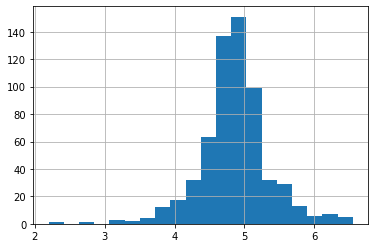

In [46]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

# Model Building : Part I

Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.

Logistic Regression is a classification algorithm.
It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
Logistic regression is an estimation of Logit function.

Lets drop the Loan_ID variable as it do not have any effect on the loan status.

In [47]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [48]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. 

In [49]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model...

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

Here the C parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting.

Let’s predict the Loan_Status for validation set and calculate its accuracy.

In [52]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7783783783783784

So our predictions are almost 77% accurate, i.e. we have identified 77% of the loan status correctly.

In [53]:
#Let’s make predictions for the test dataset.
pred_test = model.predict(test)

Lets import the submission file which we have to submit on the solution checker

In [54]:
submission = pd.read_csv('sample_submission_49d68Cx.csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


We only need the Loan_ID and the corresponding Loan_Status for the final submission.

In [58]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N

In [59]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

Finally we will convert the submission to .csv format

In [60]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [61]:
# Logistic Regression using stratified k-folds cross validation

It is a technique which reserves a particular sample of a dataset on which we do not train the model. Later, we test our model on this sample before finalizing it. Some of the common cross validation are listed below:

The validation set approach
k-fold cross validation
Leave one out cross validation (LOOCV)
Stratified k-fold cross validation


In this section we will discuss about stratified k-fold cross validation.

Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.
For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.
It is generally a better approach when dealing with both bias and variance.
A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance.

In [62]:
from sklearn.model_selection import StratifiedKFold #import sklearn

Cross validation logistic model with stratified 5 folds and make predictions for test dataset

In [63]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8048780487804879

2 of kfold 5 
accuracy_score 0.7642276422764228

3 of kfold 5 
accuracy_score 0.7804878048780488

4 of kfold 5 
accuracy_score 0.8455284552845529

5 of kfold 5 
accuracy_score 0.8032786885245902

 Mean Validation Accuracy 0.7996801279488205


The mean validation accuracy for this model turns out to be 0.79. Now we will visualize the roc curve.

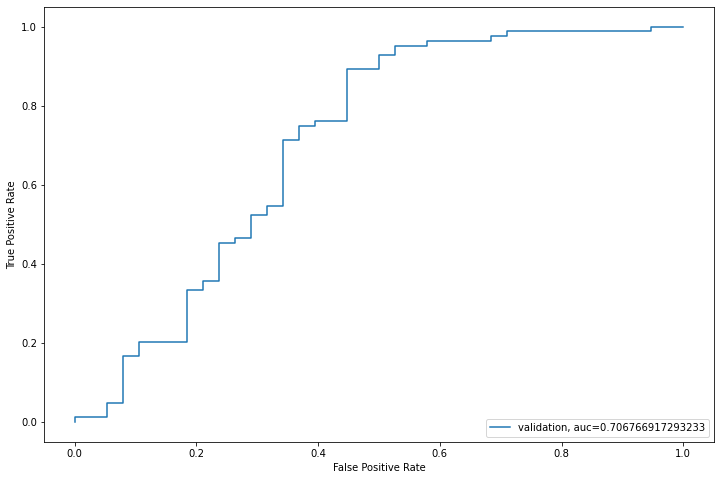

In [64]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

We got an auc value of 0.70.

In [65]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

We need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

In [66]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [67]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log1.csv')

# Feature Engineering¶

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [68]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

Let’s check the distribution of Total Income.

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

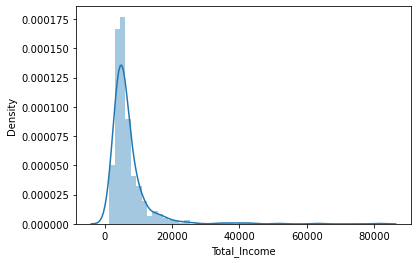

In [69]:
sns.distplot(train['Total_Income'])

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

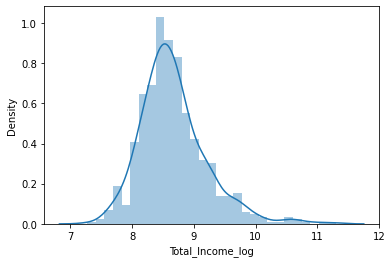

In [72]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. Let's create the EMI feature now.

In [73]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

Let’s check the distribution of EMI variable.

<AxesSubplot:xlabel='EMI', ylabel='Density'>

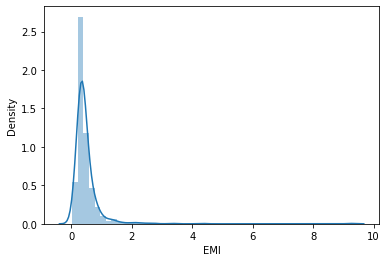

In [74]:
sns.distplot(train['EMI'])

Let us create Balance Income feature now and check its distribution.

<AxesSubplot:xlabel='Balance Income', ylabel='Density'>

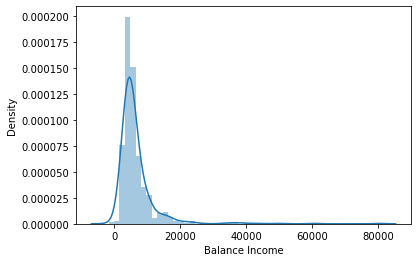

In [75]:
train['Balance Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance Income'] = test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])

Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [76]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

# Model Building : Part II

After creating new features, we can continue the model building process. So we will start with logistic regression model and then move over to more complex models like RandomForest and XGBoost. We will build the following models in this section.

Logistic Regression

Decision Tree

Random Forest

XGBoost

In [77]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

# Logistic Regression

In [78]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.7886178861788617

2 of kfold 5 
accuracy_score 0.6910569105691057

3 of kfold 5 
accuracy_score 0.6666666666666666

4 of kfold 5 
accuracy_score 0.7804878048780488

5 of kfold 5 
accuracy_score 0.680327868852459

 Mean Validation Accuracy 0.7214314274290283


In [81]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [82]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [83]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')

# Decision Tree

Let’s fit the decision tree model with 5 folds of cross validation

In [84]:
from sklearn import tree
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.7398373983739838

2 of kfold 5 
accuracy_score 0.6991869918699187

3 of kfold 5 
accuracy_score 0.7560975609756098

4 of kfold 5 
accuracy_score 0.7073170731707317

5 of kfold 5 
accuracy_score 0.6721311475409836

 Mean Validation Accuracy 0.7149140343862455


In [85]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [86]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [87]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('DecisionTree.csv')

# Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8292682926829268

2 of kfold 5 
accuracy_score 0.8130081300813008

3 of kfold 5 
accuracy_score 0.7723577235772358

4 of kfold 5 
accuracy_score 0.8048780487804879

5 of kfold 5 
accuracy_score 0.7540983606557377

 Mean Validation Accuracy 0.7947221111555378


 Now we will use grid search to get the optimized values of hyper parameters.

We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in random forest model.

# XGBOOST

XGBoost works only with numeric variables and we have already replaced the categorical variables with numeric variables. Let's have a look at the parameters that we are going to use in our model.

n_estimator: This specifies the number of trees for the model.

max_depth: We can specify maximum depth of a tree using this parameter.

In [89]:
from xgboost import XGBClassifier
i=1 
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5
[09:40:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.7804878048780488

2 of kfold 5
[09:40:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.7886178861788617

3 of kfold 5
[09:41:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if 

Mean Validation Accuracy of XGBoost is 77 %

In [90]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [91]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [93]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')